In [327]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as scp
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import (RandomForestRegressor, ExtraTreesRegressor, 
                            StackingRegressor, BaggingRegressor, GradientBoostingRegressor)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

import pickle
import os

In [2]:
df = pd.read_csv('../../2-cleaning-EDA/data/cleaned_random_replays.csv')

In [397]:
boay = pd.read_csv('../../2-cleaning-EDA/data/boay_cleaned.csv')
eden = pd.read_csv('../../2-cleaning-EDA/data/eden_cleaned.csv')
vinu = pd.read_csv('../../2-cleaning-EDA/data/vinu_cleaned.csv')
cho = pd.read_csv('../../2-cleaning-EDA/data/cho_cleaned.csv')

In [3]:
df

,shots,goals,saves,assists,score,mvp,bcpm,avg_amount,amount_collected,amount_stolen,...,percent_behind_ball,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken,player_rank,numeric_rank
0,0,0,1,0,220,0,241.58151,33.00,1332,224,...,68.022736,31.977266,45.251194,33.099570,27.174898,47.548515,0,0,Silver 2 Division 2,18
1,0,0,0,0,90,0,200.77383,42.48,1107,137,...,63.572340,36.427658,32.736835,31.013844,35.578260,27.416721,1,0,Silver 2 Division 2,18
2,0,0,0,0,74,0,114.26153,34.05,630,60,...,64.225230,35.774780,25.391450,34.973700,36.606007,28.021280,0,1,Silver 2 Division 2,18
3,0,0,0,0,24,0,137.69020,14.24,276,60,...,58.668950,41.331055,16.130373,35.004574,41.739420,16.462957,0,0,Platinum 1 Division 1,37
4,2,0,0,0,92,0,154.41177,43.05,672,183,...,65.157740,34.842260,27.113974,41.015625,31.709558,34.964767,0,1,Silver 3 Division 4,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5129,0,0,0,1,82,0,220.75021,55.64,972,200,...,67.237564,32.762436,30.962566,35.239788,24.224989,37.737990,0,1,Bronze 2 Division 4,8
5130,6,4,0,1,651,1,329.76266,60.54,1452,734,...,80.040920,19.959084,48.866350,25.171278,41.485294,35.769710,0,0,Bronze 2 Division 4,8
5131,2,1,1,1,306,0,278.27320,46.01,1243,263,...,71.521706,28.478289,28.245213,34.662884,28.133278,30.558560,2,1,Grand Champion 1 Division 1,73
5132,4,1,1,0,296,0,387.52283,45.13,1731,85,...,70.528920,29.471087,32.648033,36.677734,35.744934,34.401700,1,0,Grand Champion 1 Division 1,73


In [4]:
 name_ranks = list(df.player_rank.unique())

In [5]:
number_ranks = list(df.numeric_rank.unique())

In [6]:
sorted(list(zip(number_ranks, name_ranks)))

[(1, 'Bronze 1 Division 1'),
 (2, 'Bronze 1 Division 2'),
 (3, 'Bronze 1 Division 3'),
 (4, 'Bronze 1 Division 4'),
 (5, 'Bronze 2 Division 1'),
 (6, 'Bronze 2 Division 2'),
 (7, 'Bronze 2 Division 3'),
 (8, 'Bronze 2 Division 4'),
 (9, 'Bronze 3 Division 1'),
 (10, 'Bronze 3 Division 2'),
 (11, 'Bronze 3 Division 3'),
 (12, 'Bronze 3 Division 4'),
 (14, 'Silver 1 Division 2'),
 (15, 'Silver 1 Division 3'),
 (16, 'Silver 1 Division 4'),
 (17, 'Silver 2 Division 1'),
 (18, 'Silver 2 Division 2'),
 (19, 'Silver 2 Division 3'),
 (20, 'Silver 2 Division 4'),
 (21, 'Silver 3 Division 1'),
 (22, 'Silver 3 Division 2'),
 (23, 'Silver 3 Division 3'),
 (24, 'Silver 3 Division 4'),
 (25, 'Gold 1 Division 1'),
 (26, 'Gold 1 Division 2'),
 (27, 'Gold 1 Division 3'),
 (28, 'Gold 1 Division 4'),
 (29, 'Gold 2 Division 1'),
 (30, 'Gold 2 Division 2'),
 (31, 'Gold 2 Division 3'),
 (32, 'Gold 2 Division 4'),
 (33, 'Gold 3 Division 1'),
 (34, 'Gold 3 Division 2'),
 (35, 'Gold 3 Division 3'),
 (36, 'Gold

In [7]:
dict_ranks = {}
for i in sorted(list(zip(number_ranks, name_ranks))):
    dict_ranks[i[0]] = i[1]

In [8]:
dict_ranks

{1: 'Bronze 1 Division 1',
 2: 'Bronze 1 Division 2',
 3: 'Bronze 1 Division 3',
 4: 'Bronze 1 Division 4',
 5: 'Bronze 2 Division 1',
 6: 'Bronze 2 Division 2',
 7: 'Bronze 2 Division 3',
 8: 'Bronze 2 Division 4',
 9: 'Bronze 3 Division 1',
 10: 'Bronze 3 Division 2',
 11: 'Bronze 3 Division 3',
 12: 'Bronze 3 Division 4',
 14: 'Silver 1 Division 2',
 15: 'Silver 1 Division 3',
 16: 'Silver 1 Division 4',
 17: 'Silver 2 Division 1',
 18: 'Silver 2 Division 2',
 19: 'Silver 2 Division 3',
 20: 'Silver 2 Division 4',
 21: 'Silver 3 Division 1',
 22: 'Silver 3 Division 2',
 23: 'Silver 3 Division 3',
 24: 'Silver 3 Division 4',
 25: 'Gold 1 Division 1',
 26: 'Gold 1 Division 2',
 27: 'Gold 1 Division 3',
 28: 'Gold 1 Division 4',
 29: 'Gold 2 Division 1',
 30: 'Gold 2 Division 2',
 31: 'Gold 2 Division 3',
 32: 'Gold 2 Division 4',
 33: 'Gold 3 Division 1',
 34: 'Gold 3 Division 2',
 35: 'Gold 3 Division 3',
 36: 'Gold 3 Division 4',
 37: 'Platinum 1 Division 1',
 38: 'Platinum 1 Divisi

In [9]:
df.drop(columns = 'player_rank', inplace=True)

In [390]:
df.dropna(inplace=True)
boay.dropna(inplace=True)
eden.dropna(inplace=True)
vinu.dropna(inplace= True)

In [11]:
to_drop = [
    'shots',
    'goals',
    'saves',
    'assists',
    'score',
    'mvp'
]

In [ ]:
df.drop(columns = to_drop, inplace=True)


In [398]:
boay.drop(columns = to_drop, inplace=True)
eden.drop(columns = to_drop, inplace=True)
vinu.drop(columns = to_drop, inplace=True)
cho.drop(columns = to_drop, inplace=True)


In [399]:
boay.drop(columns = 'Unnamed: 0', inplace=True)
eden.drop(columns = 'Unnamed: 0', inplace=True)
vinu.drop(columns = 'Unnamed: 0', inplace=True)
cho.drop(columns = 'Unnamed: 0', inplace=True)

In [13]:
X = df.drop(columns = 'numeric_rank')
y = df.numeric_rank

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)

In [14]:
y_base = [y.mean()] * len(y_train)

In [15]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.68804684151937

In [16]:
lr.score(X_test, y_test)

0.6772018579692327

In [17]:
lr.fit(X_train, y_base)

LinearRegression()

In [18]:
lr.score(X_train, y_train)

-1.6550398429515667e-07

In [19]:
lr.score(X_test, y_test)

-1.4978557583145147e-06

In [20]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [21]:
poly = PolynomialFeatures(interaction_only=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [22]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
lr.score(X_train, y_train)

0.6880468415179507

In [24]:
lr.score(X_test, y_test)

0.6772018579686387

In [25]:
ridge = RidgeCV(alphas = np.logspace(0,100, 100))

ridge.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e+000, 1.02353102e+001, 1.04761575e+002, 1.07226722e+003,
       1.09749877e+004, 1.12332403e+005, 1.14975700e+006, 1.17681195e+007,
       1.20450354e+008, 1.23284674e+009, 1.26185688e+010, 1.29154967e+011,
       1.32194115e+012, 1.35304777e+013, 1.38488637e+014, 1.41747416e+015,
       1.45082878e+016, 1.48496826e+017, 1.51991108e+018, 1.55567614e+019,
       1.592282...
       5.85702082e+076, 5.99484250e+077, 6.13590727e+078, 6.28029144e+079,
       6.42807312e+080, 6.57933225e+081, 6.73415066e+082, 6.89261210e+083,
       7.05480231e+084, 7.22080902e+085, 7.39072203e+086, 7.56463328e+087,
       7.74263683e+088, 7.92482898e+089, 8.11130831e+090, 8.30217568e+091,
       8.49753436e+092, 8.69749003e+093, 8.90215085e+094, 9.11162756e+095,
       9.32603347e+096, 9.54548457e+097, 9.77009957e+098, 1.00000000e+100]))

In [26]:
ridge.score(X_train, y_train)

0.6875473593714619

In [27]:
ridge.score(X_test, y_test)

0.6776618424009315

In [28]:
randf = RandomForestRegressor()

In [29]:
gs_randf = GridSearchCV(
    randf,
    param_grid={
        'n_estimators' : [80,90,100,110,120],
        'max_depth' : [3,5,7],
        'min_samples_split' : [2,3,4,5]
    },
    cv = 5,
    verbose = 2,
    n_jobs = -1
)

In [30]:
gs_randf.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [80, 90, 100, 110, 120]},
             verbose=2)

In [31]:
gs_randf.score(X_train, y_train)

0.8121046944771192

In [32]:
gs_randf.score(X_test, y_test)

0.7063028999916658

In [33]:
et = ExtraTreesRegressor()

In [34]:
gs_et = GridSearchCV(
    et,
    param_grid={
        'n_estimators' : [80, 90, 100, 110, 120],
        'min_samples_split' : [2,3,4,5,6],
        'max_depth' : [3,5,7,8],
        'min_samples_leaf' : [1,2,3]
    },
    verbose = 1,
    cv = 5,
    n_jobs = -1
)

In [35]:
gs_et.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [80, 90, 100, 110, 120]},
             verbose=1)

In [36]:
gs_et.score(X_train, y_train)

0.7976562082052925

In [37]:
gs_et.score(X_test, y_test)

0.7110852669242038

In [38]:
knn = KNeighborsRegressor()

knn.fit(X_train, y_train)
knn.score(X_train, y_train), knn.score(X_test, y_test)


(0.7575300076414608, 0.6331696976098352)

In [39]:
gbrt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbrt.fit(X_train, y_train)

gbrt.score(X_train, y_train), gbrt.score(X_test, y_test)

(0.8254834802825721, 0.7410111069742067)

In [40]:
gs_gbrt = GridSearchCV(
    gbrt,
    param_grid={
        'n_estimators' : [90, 100, 110, 120, 150],
        'learning_rate' : [0.05, 0.1, 0.15, 0.2, 0.5],
        'max_depth' : [2,3,5,7],
        'min_samples_split' : [2,3,4]
    },
    cv = 5,
    verbose = 1,
    n_jobs = -1
)

In [41]:
gs_gbrt.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.5],
                         'max_depth': [2, 3, 5, 7],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [90, 100, 110, 120, 150]},
             verbose=1)

In [42]:
gs_gbrt.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 2,
 'n_estimators': 150}

In [43]:
gs_gbrt.best_estimator_.score(X_train, y_train)

0.9472278204087854

In [44]:
gs_gbrt.best_estimator_.score(X_test, y_test)

0.7570668381292907

In [171]:
gbrt_2 = GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=3, subsample=0.8,
                                  min_samples_split=5, min_samples_leaf=5, 
                                  loss = 'squared_error', alpha = 0.5, random_state=42)

In [172]:
gbrt_2.fit(X_train, y_train)
gbrt_2.score(X_train, y_train), gbrt_2.score(X_test, y_test)

(0.8485000224933589, 0.7577996891846467)

In [173]:
mean_squared_error(y_test, gbrt_2.predict(X_test), squared = False)

10.579076684032543

In [174]:
gbrt_2.predict(X_test)

array([64.07390004, 52.74820236, 59.03495028, ..., 65.18443281,
       65.8134637 , 27.11153604])

In [175]:
y_test

1050    63
1307    43
4544    71
153     55
946     63
        ..
1726    47
28      78
4870    60
1047    66
2560    22
Name: numeric_rank, Length: 1283, dtype: int64

In [176]:
preds = pd.DataFrame(y_test)

preds['preds'] = gbrt_2.predict(X_test)

preds['dif'] = gbrt_2.predict(X_test) - y_test

In [177]:
preds

,numeric_rank,preds,dif
1050,63,64.073900,1.073900
1307,43,52.748202,9.748202
4544,71,59.034950,-11.965050
153,55,46.844302,-8.155698
946,63,68.348582,5.348582
...,...,...,...
1726,47,41.189657,-5.810343
28,78,79.304063,1.304063
4870,60,65.184433,5.184433
1047,66,65.813464,-0.186536


<Axes: xlabel='numeric_rank', ylabel='dif'>

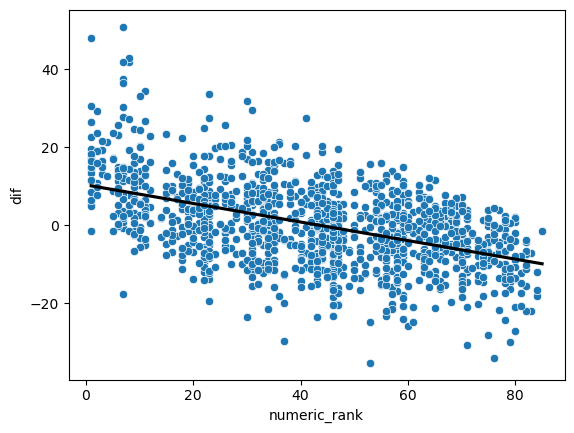

In [178]:
sns.regplot(x = preds.numeric_rank, y = preds.dif, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds.numeric_rank, y = preds.dif)

<Axes: xlabel='numeric_rank', ylabel='preds'>

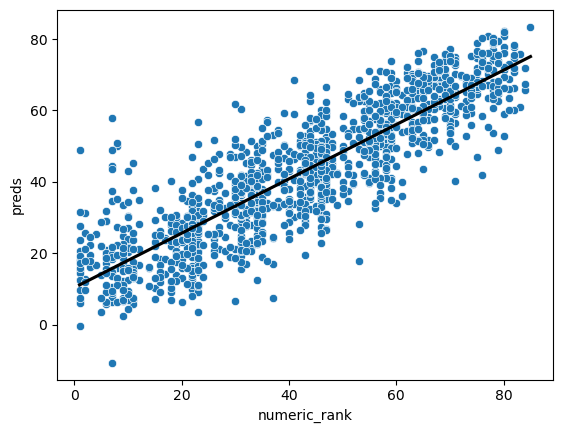

In [179]:
sns.regplot(x = preds.numeric_rank, y = preds.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds.numeric_rank, y = preds.preds)

In [108]:
preds.dif.sort_values()

1900   -49.935475
2354   -48.366117
3522   -47.375076
902    -45.581942
3838   -39.312660
          ...    
3852    32.015932
3       32.374996
3879    32.857776
4823    34.252873
1075    37.028940
Name: dif, Length: 1283, dtype: float64

In [120]:
preds.loc[419]

numeric_rank    47.00000
preds           33.41808
dif             13.58192
Name: 419, dtype: float64

In [141]:
preds_2 = pd.DataFrame(y_test)

preds_2['preds'] = gbrt.predict(X_test)

preds_2['dif'] = gbrt.predict(X_test) - y_test

<Axes: xlabel='numeric_rank', ylabel='dif'>

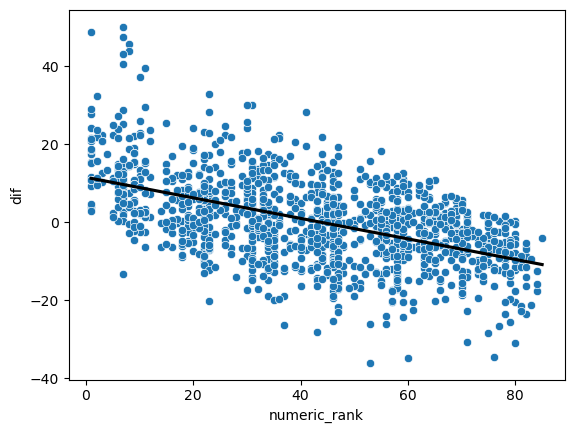

In [142]:
sns.regplot(x = preds_2.numeric_rank, y = preds_2.dif, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_2.numeric_rank, y = preds_2.dif)

<Axes: xlabel='numeric_rank', ylabel='preds'>

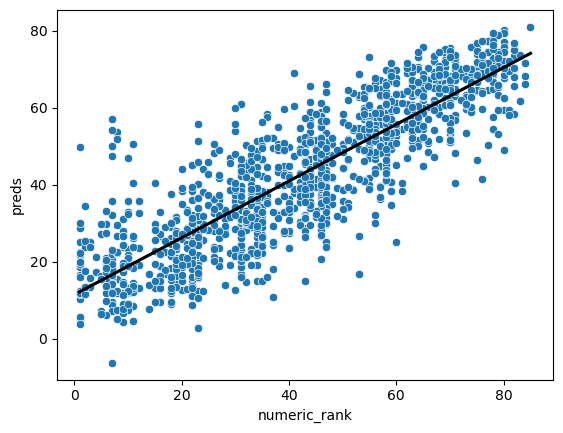

In [143]:
sns.regplot(x = preds_2.numeric_rank, y = preds_2.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_2.numeric_rank, y = preds_2.preds)

In [231]:
def eval_models(model, model_name:str, model_df = None, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    if model_df is None:
            model_df = pd.DataFrame(columns = ['train_r2', 'test_r2', 'MSE'])
            
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, preds, squared = False)
    
    model_df.loc[model_name,:] = [train_r2, test_r2, mse]
    print(model_df)
    
    df = pd.DataFrame(y_test)

    df['preds'] = model.predict(X_test)

    df['dif'] = model.predict(X_test) - y_test
    
    sns.set_style('darkgrid')
    
    fig, axs = plt.subplots(2,1, figsize = (14,12))
    sns.regplot(x = df.numeric_rank, y = df.preds, ci = 0, color = 'black', scatter = False, ax = axs[0])
    
    
    plt.suptitle(f"{model_name.title()} prediction comparison, differences across ranks")
    
    r, p = scp.stats.pearsonr(x = df.numeric_rank, 
        y = df.preds)
    axs[0].text(20, 60, 'Corr = {:.2f}'.format(r), color = 'black')

    sns.scatterplot(x = df.numeric_rank, y = df.preds, ax = axs[0]).set(
            title = f"{model_name.title()} y_preds vs y_true"
    )
    
    sns.regplot(x = df.numeric_rank, y = df.dif, ci = 0, color = 'black', scatter = False, ax = axs[1])
    
    
    r, p = scp.stats.pearsonr(x = df.numeric_rank, 
        y = df.dif)

    axs[1].text(60, 20, 'Corr = {:.2f}'.format(r), color = 'black')

    sns.scatterplot(x = df.numeric_rank, y = df.dif, color = 'green', ax= axs[1]).set(
            title = f"{model_name.title()} y_differences vs y_true"
    )
    
    return model_df

                train_r2   test_r2        MSE
gradient boost  0.825483  0.741011  10.939589


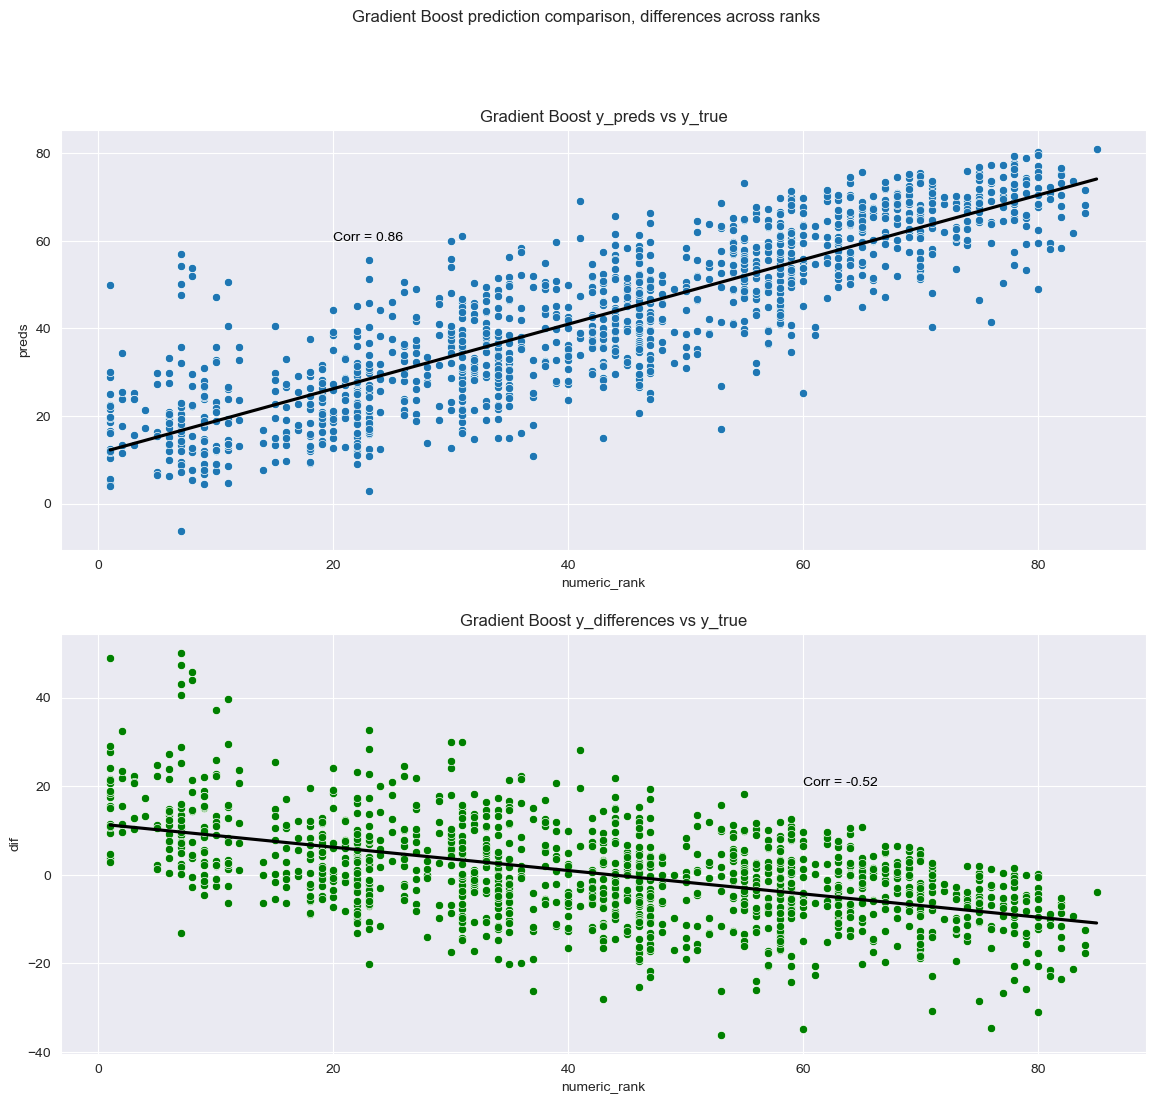

In [232]:
model_df = eval_models(gbrt, 'gradient boost')

                  train_r2   test_r2        MSE
gradient boost    0.825483  0.741011  10.939589
gradient boost 2    0.8485    0.7578  10.579077


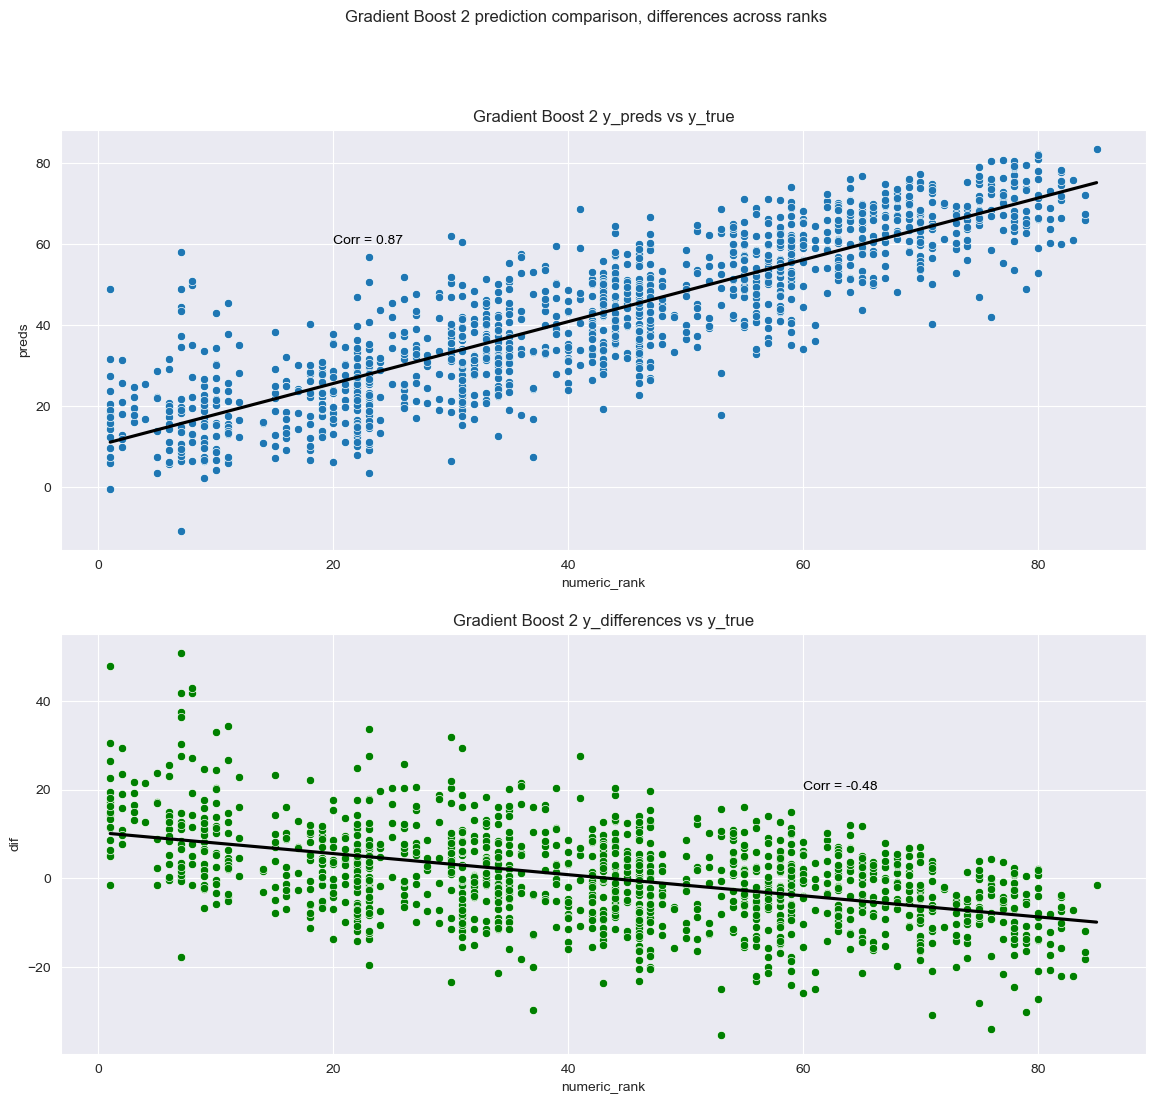

In [233]:
model_df = eval_models(gbrt_2, 'gradient boost 2', model_df = model_df)

                  train_r2   test_r2        MSE
gradient boost    0.825483  0.741011  10.939589
gradient boost 2    0.8485    0.7578  10.579077
extra trees       0.798638  0.710199  11.572042


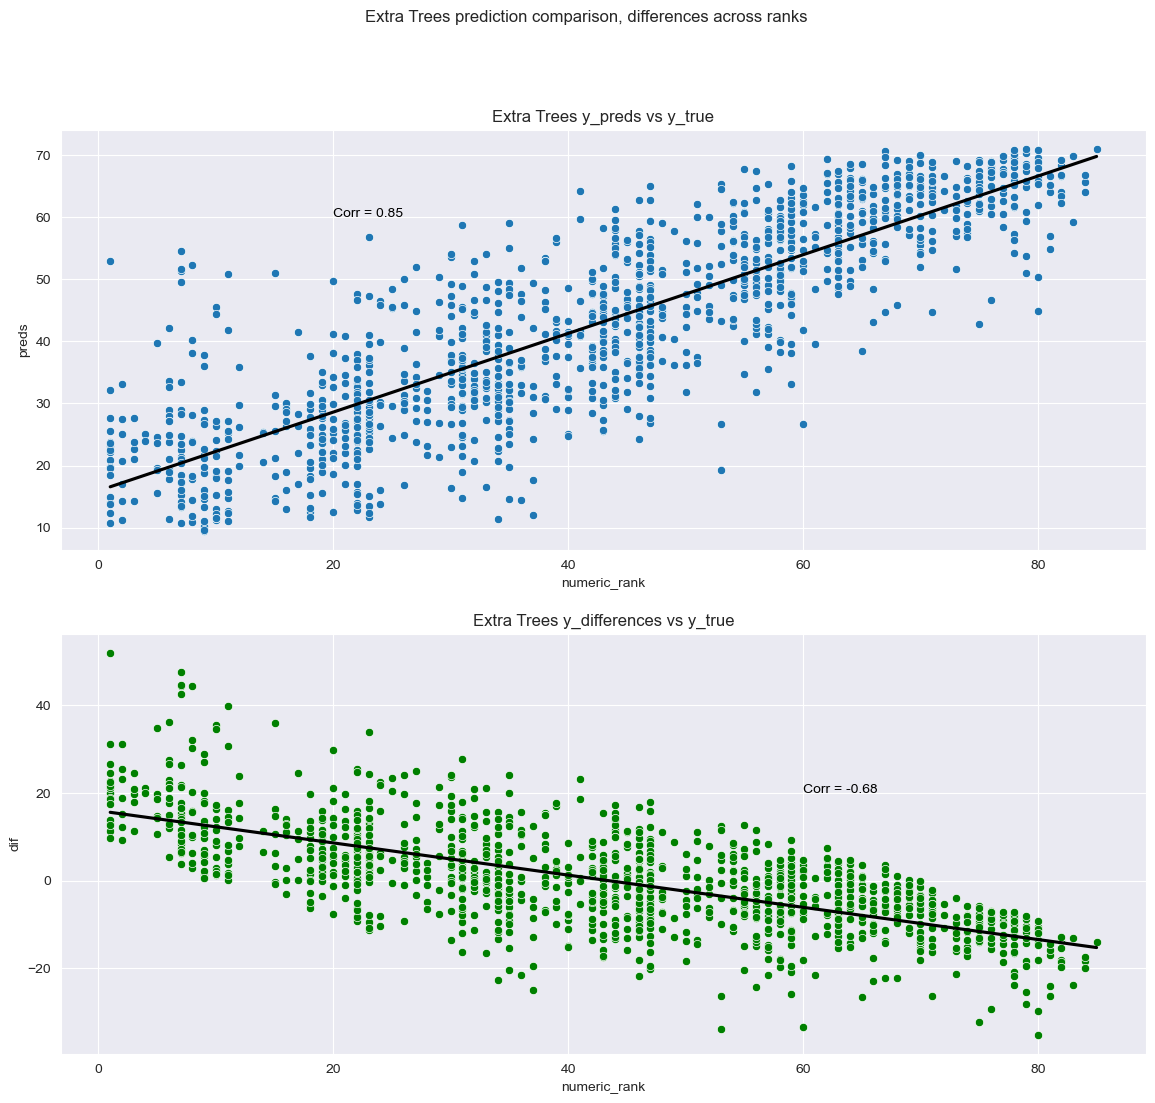

In [234]:
model_df = eval_models(gs_et.best_estimator_, 'extra trees', model_df = model_df)

                  train_r2   test_r2        MSE
gradient boost    0.825483  0.741011  10.939589
gradient boost 2    0.8485    0.7578  10.579077
extra trees       0.798638  0.710199  11.572042
random forest      0.81125  0.705679  11.661939


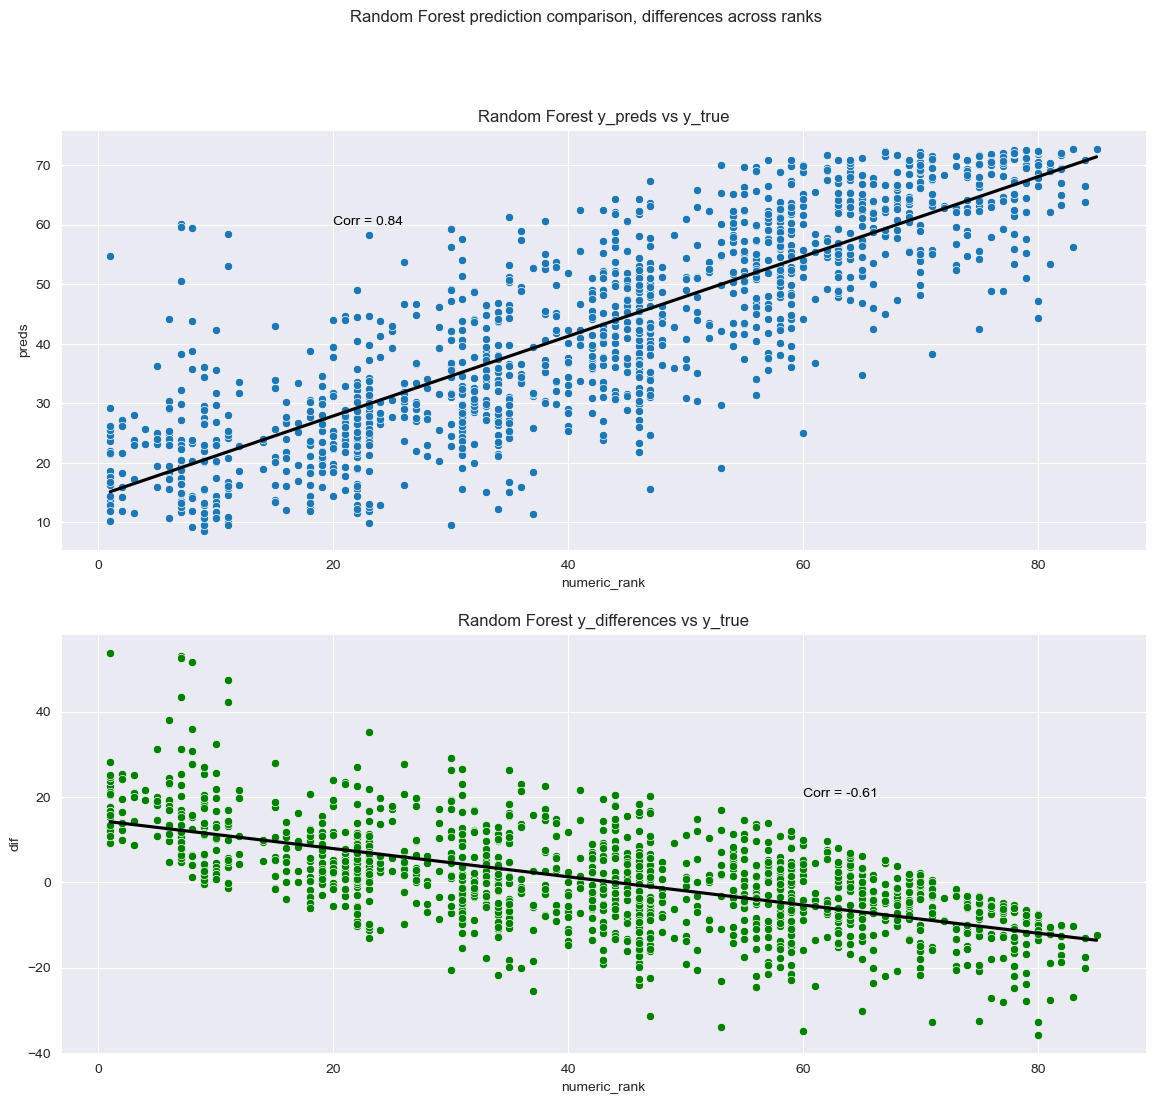

In [235]:
model_df = eval_models(gs_randf.best_estimator_, 'random forest', model_df = model_df)

                  train_r2   test_r2        MSE
gradient boost    0.825483  0.741011  10.939589
gradient boost 2    0.8485    0.7578  10.579077
extra trees       0.798638  0.710199  11.572042
random forest      0.81125  0.705679  11.661939
k nearest          0.75753   0.63317  13.019461


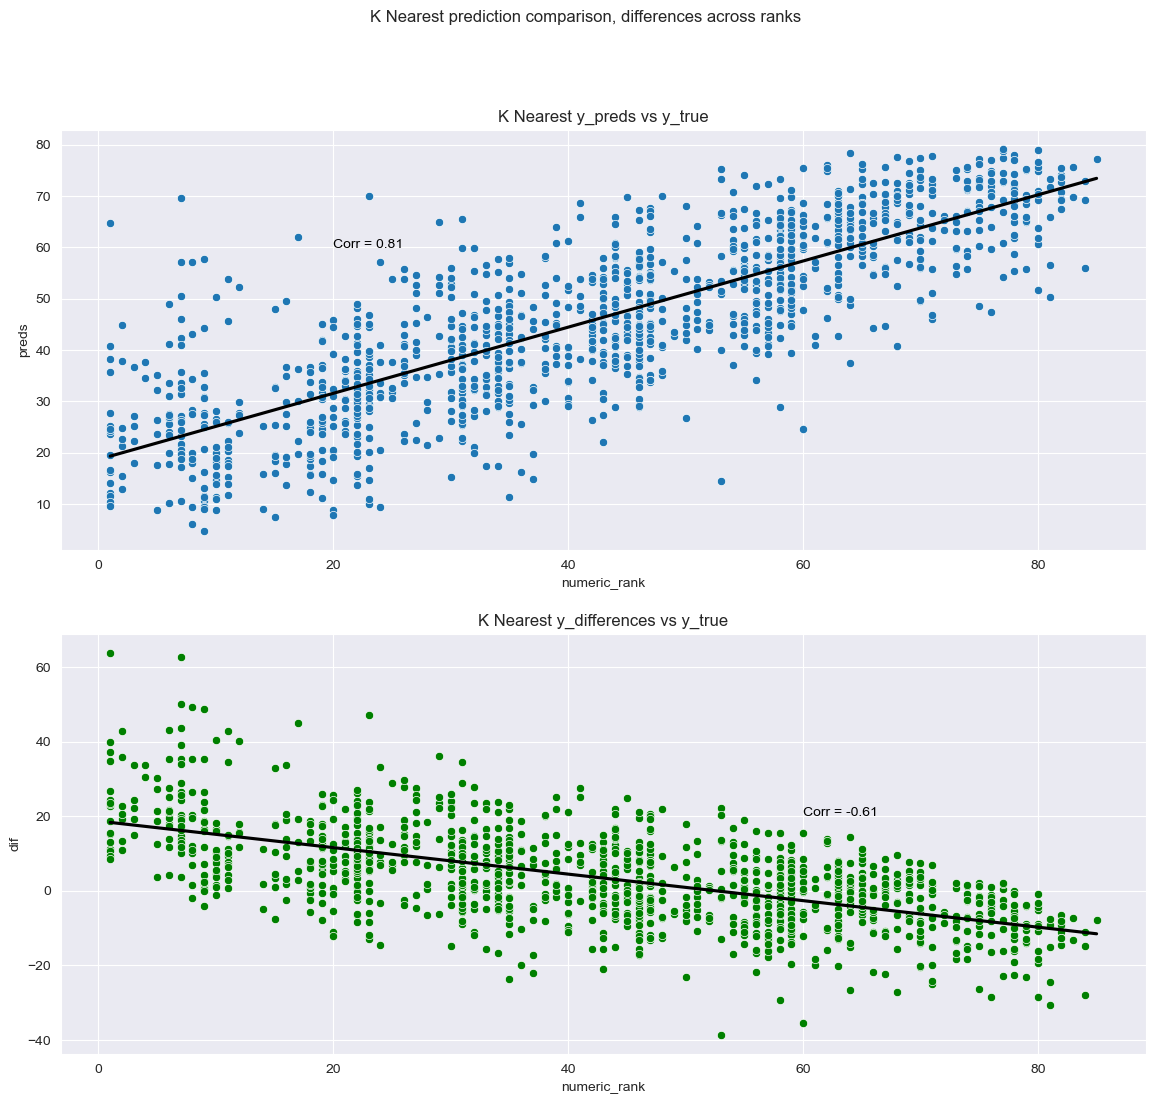

In [236]:
model_df = eval_models(knn, 'k nearest', model_df = model_df)

                          train_r2   test_r2        MSE
gradient boost            0.825483  0.741011  10.939589
gradient boost 2            0.8485    0.7578  10.579077
extra trees               0.798638  0.710199  11.572042
random forest              0.81125  0.705679  11.661939
k nearest                  0.75753   0.63317  13.019461
gradient boost (overfit)  0.947228  0.757067   10.59507


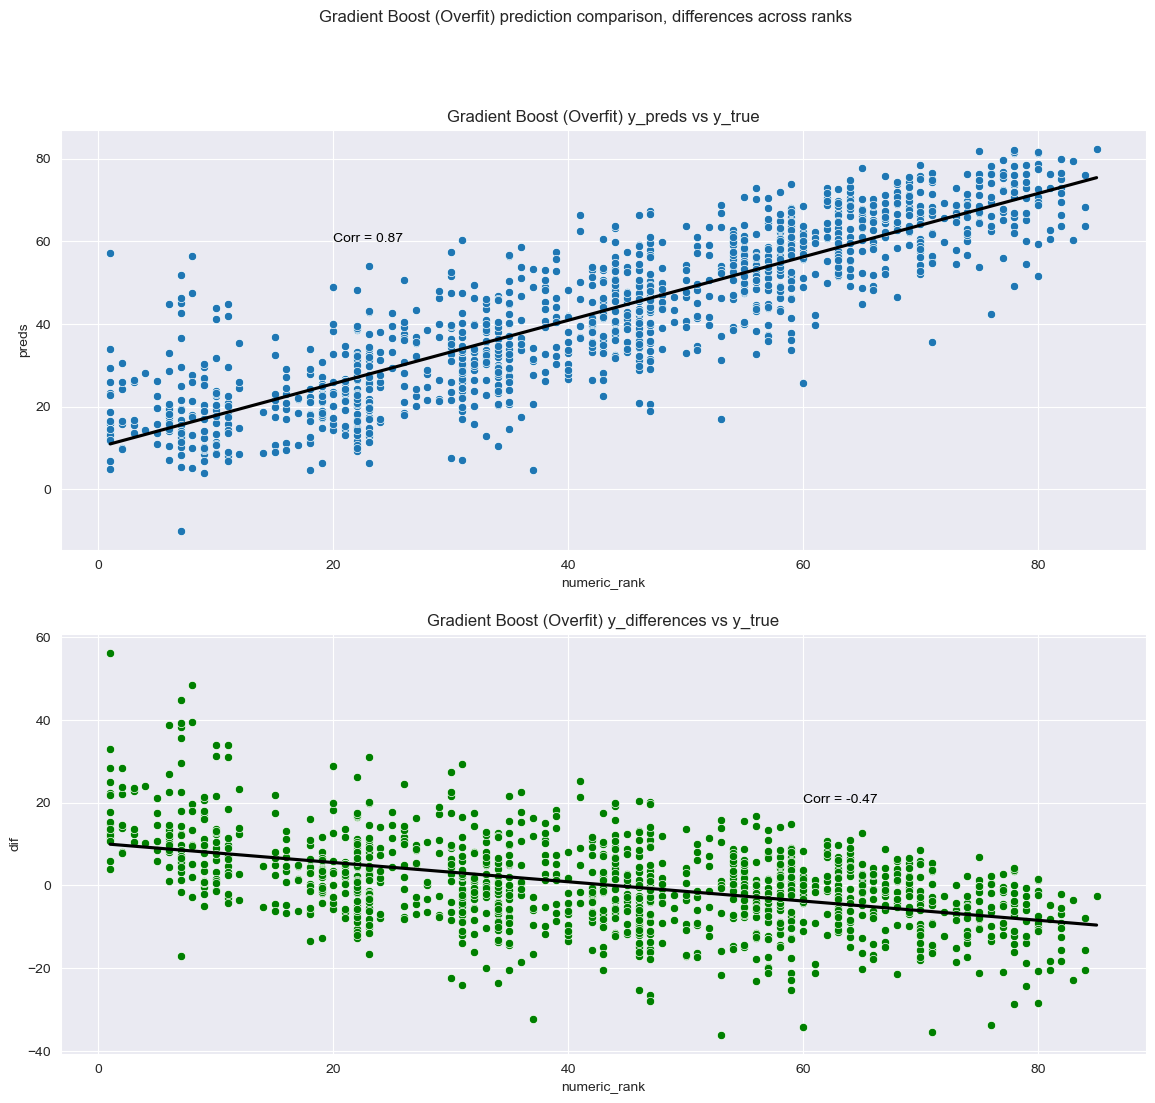

In [237]:
model_df = eval_models(gs_gbrt.best_estimator_, 'gradient boost (overfit)', model_df= model_df)

In [239]:
X_train.shape

(3846, 40)

In [307]:
import tensorflow.keras.backend as K

# Define the R-squared metric as a custom function
def r_squared(y_true, y_pred):
    SS_res =  K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

# Define the model architecture
model = Sequential()

model.add(Dense(32,
                input_shape = (40,),
                activation = 'relu'
               )
         )
         

model.add(Dense(1,
                activation = 'linear'
               )
         )

# Compile the model with R-squared as a metric
model.compile(
    optimizer='adam',                # Optimization algorithm
    loss='mean_squared_error',       # Loss function for regression
    metrics=['mse', 'mae', r_squared]  # Evaluation metrics, including R-squared
)

In [308]:
early_stop = EarlyStopping(monitor='val_loss',
                           patience = 10,
                           min_delta = 0.00,
                           restore_best_weights=True
                          )

In [309]:
history = model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs = 1500, 
          batch_size = 512,
          callbacks = [early_stop]
                   )

Epoch 1/1500
8/8 [==============================] - 2s 72ms/step - loss: 2252.8093 - mse: 2252.8093 - mae: 42.3904 - r_squared: -3.8701 - val_loss: 2227.7629 - val_mse: 2227.7629 - val_mae: 42.1608 - val_r_squared: -3.8584
Epoch 2/1500
8/8 [==============================] - 0s 18ms/step - loss: 2220.4307 - mse: 2220.4307 - mae: 42.0623 - r_squared: -3.8181 - val_loss: 2195.2139 - val_mse: 2195.2139 - val_mae: 41.8262 - val_r_squared: -3.7870
Epoch 3/1500
8/8 [==============================] - 0s 13ms/step - loss: 2188.0225 - mse: 2188.0225 - mae: 41.7252 - r_squared: -3.7558 - val_loss: 2162.5652 - val_mse: 2162.5652 - val_mae: 41.4786 - val_r_squared: -3.7153
Epoch 4/1500
8/8 [==============================] - 0s 13ms/step - loss: 2155.0977 - mse: 2155.0977 - mae: 41.3746 - r_squared: -3.6344 - val_loss: 2129.3333 - val_mse: 2129.3333 - val_mae: 41.1178 - val_r_squared: -3.6424
Epoch 5/1500
8/8 [==============================] - 0s 16ms/step - loss: 2121.4861 - mse: 2121.4861 - mae: 4

Epoch 38/1500
8/8 [==============================] - 0s 13ms/step - loss: 734.3677 - mse: 734.3677 - mae: 23.0331 - r_squared: -0.5817 - val_loss: 703.1893 - val_mse: 703.1893 - val_mae: 22.3087 - val_r_squared: -0.5179
Epoch 39/1500
8/8 [==============================] - 0s 14ms/step - loss: 710.6882 - mse: 710.6882 - mae: 22.5864 - r_squared: -0.5548 - val_loss: 680.6129 - val_mse: 680.6129 - val_mae: 21.8636 - val_r_squared: -0.4690
Epoch 40/1500
8/8 [==============================] - 0s 14ms/step - loss: 688.7831 - mse: 688.7831 - mae: 22.1682 - r_squared: -0.4998 - val_loss: 659.5497 - val_mse: 659.5497 - val_mae: 21.4370 - val_r_squared: -0.4234
Epoch 41/1500
8/8 [==============================] - 0s 11ms/step - loss: 668.5746 - mse: 668.5746 - mae: 21.7721 - r_squared: -0.4309 - val_loss: 639.9136 - val_mse: 639.9136 - val_mae: 21.0385 - val_r_squared: -0.3809
Epoch 42/1500
8/8 [==============================] - 0s 13ms/step - loss: 649.4439 - mse: 649.4439 - mae: 21.3890 - r_sq

8/8 [==============================] - 0s 14ms/step - loss: 388.1426 - mse: 388.1426 - mae: 15.9276 - r_squared: 0.1642 - val_loss: 380.1400 - val_mse: 380.1400 - val_mae: 15.6709 - val_r_squared: 0.1818
Epoch 76/1500
8/8 [==============================] - 0s 15ms/step - loss: 384.7598 - mse: 384.7598 - mae: 15.8518 - r_squared: 0.1615 - val_loss: 377.2845 - val_mse: 377.2845 - val_mae: 15.6122 - val_r_squared: 0.1880
Epoch 77/1500
8/8 [==============================] - 0s 13ms/step - loss: 381.5506 - mse: 381.5506 - mae: 15.7778 - r_squared: 0.1770 - val_loss: 374.5854 - val_mse: 374.5854 - val_mae: 15.5546 - val_r_squared: 0.1938
Epoch 78/1500
8/8 [==============================] - 0s 12ms/step - loss: 378.4384 - mse: 378.4384 - mae: 15.7048 - r_squared: 0.1795 - val_loss: 371.9029 - val_mse: 371.9029 - val_mae: 15.4995 - val_r_squared: 0.1996
Epoch 79/1500
8/8 [==============================] - 0s 10ms/step - loss: 375.3122 - mse: 375.3122 - mae: 15.6336 - r_squared: 0.1929 - val_lo

8/8 [==============================] - 0s 9ms/step - loss: 304.2760 - mse: 304.2760 - mae: 13.9260 - r_squared: 0.3478 - val_loss: 309.3287 - val_mse: 309.3287 - val_mae: 14.0794 - val_r_squared: 0.3350
Epoch 113/1500
8/8 [==============================] - 0s 10ms/step - loss: 302.5454 - mse: 302.5454 - mae: 13.8838 - r_squared: 0.3474 - val_loss: 307.9106 - val_mse: 307.9106 - val_mae: 14.0434 - val_r_squared: 0.3381
Epoch 114/1500
8/8 [==============================] - 0s 24ms/step - loss: 300.9214 - mse: 300.9214 - mae: 13.8417 - r_squared: 0.3566 - val_loss: 306.5004 - val_mse: 306.5004 - val_mae: 14.0078 - val_r_squared: 0.3411
Epoch 115/1500
8/8 [==============================] - 0s 12ms/step - loss: 299.3557 - mse: 299.3557 - mae: 13.8017 - r_squared: 0.3576 - val_loss: 305.1768 - val_mse: 305.1768 - val_mae: 13.9738 - val_r_squared: 0.3439
Epoch 116/1500
8/8 [==============================] - 0s 13ms/step - loss: 297.7142 - mse: 297.7142 - mae: 13.7609 - r_squared: 0.3582 - val

8/8 [==============================] - 0s 9ms/step - loss: 252.0164 - mse: 252.0164 - mae: 12.5793 - r_squared: 0.4579 - val_loss: 264.0980 - val_mse: 264.0980 - val_mae: 12.9345 - val_r_squared: 0.4319
Epoch 150/1500
8/8 [==============================] - 0s 10ms/step - loss: 250.8353 - mse: 250.8353 - mae: 12.5495 - r_squared: 0.4573 - val_loss: 263.0082 - val_mse: 263.0082 - val_mae: 12.9081 - val_r_squared: 0.4342
Epoch 151/1500
8/8 [==============================] - 0s 9ms/step - loss: 249.6898 - mse: 249.6898 - mae: 12.5207 - r_squared: 0.4625 - val_loss: 261.9517 - val_mse: 261.9517 - val_mae: 12.8805 - val_r_squared: 0.4365
Epoch 152/1500
8/8 [==============================] - 0s 9ms/step - loss: 248.5484 - mse: 248.5484 - mae: 12.4923 - r_squared: 0.4666 - val_loss: 260.8800 - val_mse: 260.8800 - val_mae: 12.8530 - val_r_squared: 0.4388
Epoch 153/1500
8/8 [==============================] - 0s 9ms/step - loss: 247.4033 - mse: 247.4033 - mae: 12.4630 - r_squared: 0.4666 - val_lo

8/8 [==============================] - 0s 9ms/step - loss: 215.0275 - mse: 215.0275 - mae: 11.5809 - r_squared: 0.5367 - val_loss: 231.6138 - val_mse: 231.6138 - val_mae: 12.0660 - val_r_squared: 0.5004
Epoch 187/1500
8/8 [==============================] - 0s 9ms/step - loss: 214.1689 - mse: 214.1689 - mae: 11.5571 - r_squared: 0.5389 - val_loss: 230.8518 - val_mse: 230.8518 - val_mae: 12.0442 - val_r_squared: 0.5021
Epoch 188/1500
8/8 [==============================] - 0s 9ms/step - loss: 213.3529 - mse: 213.3529 - mae: 11.5365 - r_squared: 0.5398 - val_loss: 230.1005 - val_mse: 230.1005 - val_mae: 12.0233 - val_r_squared: 0.5037
Epoch 189/1500
8/8 [==============================] - 0s 9ms/step - loss: 212.5732 - mse: 212.5732 - mae: 11.5169 - r_squared: 0.5440 - val_loss: 229.4146 - val_mse: 229.4146 - val_mae: 12.0075 - val_r_squared: 0.5051
Epoch 190/1500
8/8 [==============================] - 0s 9ms/step - loss: 211.7112 - mse: 211.7112 - mae: 11.4923 - r_squared: 0.5424 - val_los

Epoch 224/1500
8/8 [==============================] - 0s 8ms/step - loss: 187.0882 - mse: 187.0882 - mae: 10.7752 - r_squared: 0.5976 - val_loss: 206.8920 - val_mse: 206.8920 - val_mae: 11.3349 - val_r_squared: 0.5523
Epoch 225/1500
8/8 [==============================] - 0s 9ms/step - loss: 186.4839 - mse: 186.4839 - mae: 10.7565 - r_squared: 0.5981 - val_loss: 206.2832 - val_mse: 206.2832 - val_mae: 11.3190 - val_r_squared: 0.5536
Epoch 226/1500
8/8 [==============================] - 0s 9ms/step - loss: 185.8892 - mse: 185.8892 - mae: 10.7385 - r_squared: 0.6040 - val_loss: 205.7523 - val_mse: 205.7523 - val_mae: 11.3013 - val_r_squared: 0.5548
Epoch 227/1500
8/8 [==============================] - 0s 8ms/step - loss: 185.2383 - mse: 185.2383 - mae: 10.7197 - r_squared: 0.5994 - val_loss: 205.2360 - val_mse: 205.2360 - val_mae: 11.2883 - val_r_squared: 0.5559
Epoch 228/1500
8/8 [==============================] - 0s 8ms/step - loss: 184.6078 - mse: 184.6078 - mae: 10.7013 - r_squared: 0

8/8 [==============================] - 0s 11ms/step - loss: 166.2507 - mse: 166.2507 - mae: 10.1222 - r_squared: 0.6437 - val_loss: 188.3523 - val_mse: 188.3523 - val_mae: 10.7374 - val_r_squared: 0.5915
Epoch 262/1500
8/8 [==============================] - 0s 8ms/step - loss: 165.6653 - mse: 165.6653 - mae: 10.1020 - r_squared: 0.6386 - val_loss: 187.7899 - val_mse: 187.7899 - val_mae: 10.7196 - val_r_squared: 0.5927
Epoch 263/1500
8/8 [==============================] - 0s 9ms/step - loss: 165.1729 - mse: 165.1729 - mae: 10.0891 - r_squared: 0.6466 - val_loss: 187.3179 - val_mse: 187.3179 - val_mae: 10.7021 - val_r_squared: 0.5937
Epoch 264/1500
8/8 [==============================] - 0s 12ms/step - loss: 164.6531 - mse: 164.6531 - mae: 10.0738 - r_squared: 0.6463 - val_loss: 186.8901 - val_mse: 186.8901 - val_mae: 10.6871 - val_r_squared: 0.5947
Epoch 265/1500
8/8 [==============================] - 0s 9ms/step - loss: 164.1786 - mse: 164.1786 - mae: 10.0580 - r_squared: 0.6481 - val_l

Epoch 299/1500
8/8 [==============================] - 0s 8ms/step - loss: 148.3948 - mse: 148.3948 - mae: 9.5441 - r_squared: 0.6803 - val_loss: 171.8916 - val_mse: 171.8916 - val_mae: 10.1932 - val_r_squared: 0.6263
Epoch 300/1500
8/8 [==============================] - 0s 8ms/step - loss: 147.9635 - mse: 147.9635 - mae: 9.5314 - r_squared: 0.6820 - val_loss: 171.5747 - val_mse: 171.5747 - val_mae: 10.1845 - val_r_squared: 0.6270
Epoch 301/1500
8/8 [==============================] - 0s 8ms/step - loss: 147.4920 - mse: 147.4920 - mae: 9.5196 - r_squared: 0.6834 - val_loss: 171.3454 - val_mse: 171.3454 - val_mae: 10.1754 - val_r_squared: 0.6275
Epoch 302/1500
8/8 [==============================] - 0s 8ms/step - loss: 147.1470 - mse: 147.1470 - mae: 9.5079 - r_squared: 0.6807 - val_loss: 171.0253 - val_mse: 171.0253 - val_mae: 10.1633 - val_r_squared: 0.6281
Epoch 303/1500
8/8 [==============================] - 0s 9ms/step - loss: 146.6680 - mse: 146.6680 - mae: 9.4882 - r_squared: 0.6862

Epoch 337/1500
8/8 [==============================] - 0s 9ms/step - loss: 133.6207 - mse: 133.6207 - mae: 9.0357 - r_squared: 0.7130 - val_loss: 158.1523 - val_mse: 158.1523 - val_mae: 9.7263 - val_r_squared: 0.6552
Epoch 338/1500
8/8 [==============================] - 0s 8ms/step - loss: 133.2961 - mse: 133.2961 - mae: 9.0231 - r_squared: 0.7127 - val_loss: 157.7822 - val_mse: 157.7822 - val_mae: 9.7144 - val_r_squared: 0.6559
Epoch 339/1500
8/8 [==============================] - 0s 9ms/step - loss: 132.9711 - mse: 132.9711 - mae: 9.0156 - r_squared: 0.7169 - val_loss: 157.5406 - val_mse: 157.5406 - val_mae: 9.7058 - val_r_squared: 0.6564
Epoch 340/1500
8/8 [==============================] - 0s 8ms/step - loss: 132.6144 - mse: 132.6144 - mae: 8.9980 - r_squared: 0.7146 - val_loss: 157.3526 - val_mse: 157.3526 - val_mae: 9.6953 - val_r_squared: 0.6568
Epoch 341/1500
8/8 [==============================] - 0s 8ms/step - loss: 132.2461 - mse: 132.2461 - mae: 8.9796 - r_squared: 0.7148 - v

Epoch 375/1500
8/8 [==============================] - 0s 9ms/step - loss: 121.7747 - mse: 121.7747 - mae: 8.6013 - r_squared: 0.7404 - val_loss: 146.1323 - val_mse: 146.1323 - val_mae: 9.3155 - val_r_squared: 0.6806
Epoch 376/1500
8/8 [==============================] - 0s 9ms/step - loss: 121.5079 - mse: 121.5079 - mae: 8.5927 - r_squared: 0.7391 - val_loss: 145.9377 - val_mse: 145.9377 - val_mae: 9.3041 - val_r_squared: 0.6810
Epoch 377/1500
8/8 [==============================] - 0s 9ms/step - loss: 121.2275 - mse: 121.2275 - mae: 8.5823 - r_squared: 0.7349 - val_loss: 145.6728 - val_mse: 145.6728 - val_mae: 9.2939 - val_r_squared: 0.6815
Epoch 378/1500
8/8 [==============================] - 0s 8ms/step - loss: 120.9313 - mse: 120.9313 - mae: 8.5691 - r_squared: 0.7383 - val_loss: 145.4061 - val_mse: 145.4061 - val_mae: 9.2857 - val_r_squared: 0.6821
Epoch 379/1500
8/8 [==============================] - 0s 11ms/step - loss: 120.7018 - mse: 120.7018 - mae: 8.5624 - r_squared: 0.7387 - 

Epoch 413/1500
8/8 [==============================] - 0s 10ms/step - loss: 112.6815 - mse: 112.6815 - mae: 8.2631 - r_squared: 0.7590 - val_loss: 137.4308 - val_mse: 137.4308 - val_mae: 8.9942 - val_r_squared: 0.6994
Epoch 414/1500
8/8 [==============================] - 0s 9ms/step - loss: 112.4676 - mse: 112.4676 - mae: 8.2588 - r_squared: 0.7562 - val_loss: 137.2335 - val_mse: 137.2335 - val_mae: 8.9867 - val_r_squared: 0.6998
Epoch 415/1500
8/8 [==============================] - 0s 9ms/step - loss: 112.3190 - mse: 112.3190 - mae: 8.2535 - r_squared: 0.7562 - val_loss: 137.0721 - val_mse: 137.0721 - val_mae: 8.9796 - val_r_squared: 0.7001
Epoch 416/1500
8/8 [==============================] - 0s 8ms/step - loss: 112.1180 - mse: 112.1180 - mae: 8.2455 - r_squared: 0.7567 - val_loss: 137.1238 - val_mse: 137.1238 - val_mae: 8.9766 - val_r_squared: 0.6999
Epoch 417/1500
8/8 [==============================] - 0s 8ms/step - loss: 111.8826 - mse: 111.8826 - mae: 8.2396 - r_squared: 0.7615 - 

Epoch 451/1500
8/8 [==============================] - 0s 8ms/step - loss: 106.1919 - mse: 106.1919 - mae: 8.0128 - r_squared: 0.7713 - val_loss: 131.8687 - val_mse: 131.8687 - val_mae: 8.7771 - val_r_squared: 0.7116
Epoch 452/1500
8/8 [==============================] - 0s 8ms/step - loss: 106.0384 - mse: 106.0384 - mae: 8.0114 - r_squared: 0.7742 - val_loss: 131.8279 - val_mse: 131.8279 - val_mae: 8.7728 - val_r_squared: 0.7117
Epoch 453/1500
8/8 [==============================] - 0s 8ms/step - loss: 105.9654 - mse: 105.9654 - mae: 8.0077 - r_squared: 0.7735 - val_loss: 131.7031 - val_mse: 131.7031 - val_mae: 8.7640 - val_r_squared: 0.7120
Epoch 454/1500
8/8 [==============================] - 0s 8ms/step - loss: 105.7869 - mse: 105.7869 - mae: 7.9965 - r_squared: 0.7713 - val_loss: 131.5157 - val_mse: 131.5157 - val_mae: 8.7591 - val_r_squared: 0.7124
Epoch 455/1500
8/8 [==============================] - 0s 10ms/step - loss: 105.6578 - mse: 105.6578 - mae: 7.9955 - r_squared: 0.7722 - 

Epoch 489/1500
8/8 [==============================] - 0s 12ms/step - loss: 101.4861 - mse: 101.4861 - mae: 7.8406 - r_squared: 0.7815 - val_loss: 127.9775 - val_mse: 127.9775 - val_mae: 8.6199 - val_r_squared: 0.7203
Epoch 490/1500
8/8 [==============================] - 0s 9ms/step - loss: 101.3159 - mse: 101.3159 - mae: 7.8306 - r_squared: 0.7828 - val_loss: 128.0454 - val_mse: 128.0454 - val_mae: 8.6196 - val_r_squared: 0.7202
Epoch 491/1500
8/8 [==============================] - 0s 10ms/step - loss: 101.1785 - mse: 101.1785 - mae: 7.8225 - r_squared: 0.7834 - val_loss: 128.0009 - val_mse: 128.0009 - val_mae: 8.6131 - val_r_squared: 0.7202
Epoch 492/1500
8/8 [==============================] - 0s 13ms/step - loss: 101.0985 - mse: 101.0985 - mae: 7.8209 - r_squared: 0.7816 - val_loss: 127.9073 - val_mse: 127.9073 - val_mae: 8.6083 - val_r_squared: 0.7204
Epoch 493/1500
8/8 [==============================] - 0s 12ms/step - loss: 101.0405 - mse: 101.0405 - mae: 7.8192 - r_squared: 0.7824

Epoch 527/1500
8/8 [==============================] - 0s 10ms/step - loss: 97.6727 - mse: 97.6727 - mae: 7.6829 - r_squared: 0.7879 - val_loss: 125.1567 - val_mse: 125.1567 - val_mae: 8.4975 - val_r_squared: 0.7267
Epoch 528/1500
8/8 [==============================] - 0s 10ms/step - loss: 97.5976 - mse: 97.5976 - mae: 7.6864 - r_squared: 0.7865 - val_loss: 125.2281 - val_mse: 125.2281 - val_mae: 8.4974 - val_r_squared: 0.7266
Epoch 529/1500
8/8 [==============================] - 0s 11ms/step - loss: 97.5820 - mse: 97.5820 - mae: 7.6880 - r_squared: 0.7907 - val_loss: 125.2307 - val_mse: 125.2307 - val_mae: 8.5025 - val_r_squared: 0.7265
Epoch 530/1500
8/8 [==============================] - 0s 13ms/step - loss: 97.4545 - mse: 97.4545 - mae: 7.6716 - r_squared: 0.7901 - val_loss: 125.2952 - val_mse: 125.2952 - val_mae: 8.4948 - val_r_squared: 0.7263
Epoch 531/1500
8/8 [==============================] - 0s 10ms/step - loss: 97.3610 - mse: 97.3610 - mae: 7.6635 - r_squared: 0.7910 - val_lo

8/8 [==============================] - 0s 13ms/step - loss: 94.6797 - mse: 94.6797 - mae: 7.5635 - r_squared: 0.7943 - val_loss: 123.0349 - val_mse: 123.0349 - val_mae: 8.4105 - val_r_squared: 0.7314
Epoch 566/1500
8/8 [==============================] - 0s 9ms/step - loss: 94.7392 - mse: 94.7392 - mae: 7.5634 - r_squared: 0.7951 - val_loss: 123.0197 - val_mse: 123.0197 - val_mae: 8.4095 - val_r_squared: 0.7313
Epoch 567/1500
8/8 [==============================] - 0s 9ms/step - loss: 94.5736 - mse: 94.5736 - mae: 7.5507 - r_squared: 0.7958 - val_loss: 122.9634 - val_mse: 122.9634 - val_mae: 8.4045 - val_r_squared: 0.7315
Epoch 568/1500
8/8 [==============================] - 0s 9ms/step - loss: 94.4972 - mse: 94.4972 - mae: 7.5517 - r_squared: 0.7965 - val_loss: 122.8281 - val_mse: 122.8281 - val_mae: 8.3987 - val_r_squared: 0.7319
Epoch 569/1500
8/8 [==============================] - 0s 9ms/step - loss: 94.4169 - mse: 94.4169 - mae: 7.5543 - r_squared: 0.7979 - val_loss: 122.9551 - val_

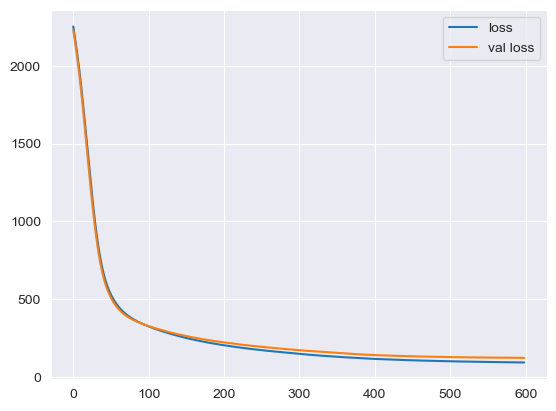

In [313]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend();

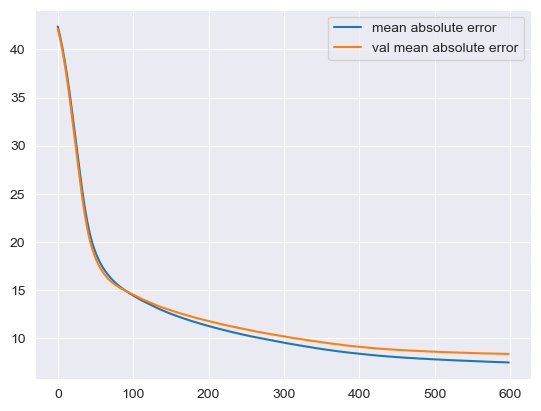

In [314]:
plt.plot(history.history['mae'], label = 'mean absolute error')
plt.plot(history.history['val_mae'], label = 'val mean absolute error')
plt.legend();

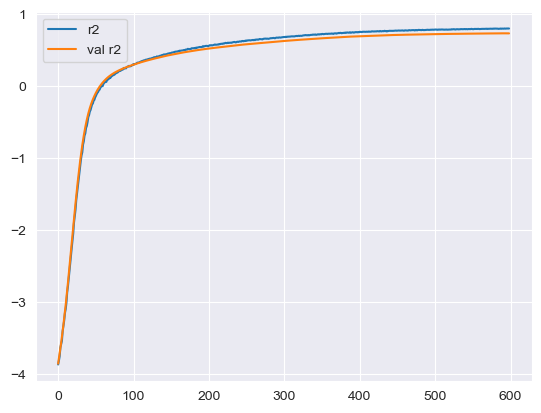

In [325]:
plt.plot(history.history['r_squared'], label = 'r2')
plt.plot(history.history['val_r_squared'], label = 'val r2')
plt.legend();

In [315]:
pd.DataFrame(model.predict(X_test))

41/41 [==============================] - 0s 2ms/step


,0
0,65.991501
1,43.622517
2,58.055908
3,40.660965
4,68.661224
...,...
1278,44.751183
1279,80.031586
1280,61.646351
1281,61.438160


In [316]:
preds_nn = pd.DataFrame(y_test)

preds_nn['preds'] = model.predict(X_test)

41/41 [==============================] - 0s 2ms/step


In [317]:
preds_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1283 entries, 1050 to 2560
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   numeric_rank  1283 non-null   int64  
 1   preds         1283 non-null   float32
dtypes: float32(1), int64(1)
memory usage: 57.3 KB


In [318]:
preds_nn['dif'] = preds_nn.preds - y_test

<Axes: xlabel='numeric_rank', ylabel='dif'>

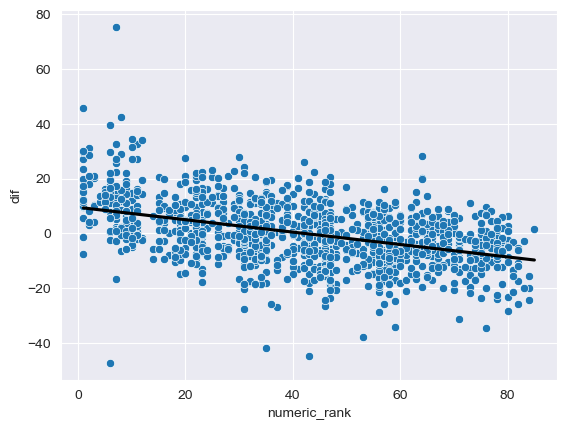

In [319]:
sns.regplot(x = preds_nn.numeric_rank, y = preds_nn.dif, ci = 0, color = 'black', scatter = False)


sns.scatterplot(x = preds_nn.numeric_rank, y = preds_nn.dif)

<Axes: xlabel='numeric_rank', ylabel='preds'>

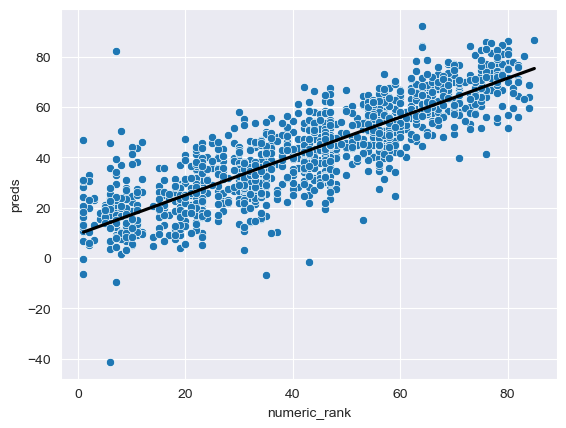

In [320]:
sns.regplot(x = preds_nn.numeric_rank, y = preds_nn.preds, ci = 0, color = 'black', scatter = False)

sns.scatterplot(x = preds_nn.numeric_rank, y = preds_nn.preds)

In [321]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 121.8041 - mse: 121.8041 - mae: 8.3610 - r_squared: 0.7286


[121.80406188964844, 121.80406188964844, 8.360979080200195, 0.7286209464073181]

In [322]:
preds_nn

,numeric_rank,preds,dif
1050,63,65.991501,2.991501
1307,43,43.622517,0.622517
4544,71,58.055908,-12.944092
153,55,40.660965,-14.339035
946,63,68.661224,5.661224
...,...,...,...
1726,47,44.751183,-2.248817
28,78,80.031586,2.031586
4870,60,61.646351,1.646351
1047,66,61.438160,-4.561840


In [328]:
with open('nn_model_rank.pkl', 'wb') as picklefile:
    pickle.dump(model, picklefile)

In [329]:
with open('gbrt_2.pkl', 'wb') as picklefile:
    pickle.dump(gbrt_2, picklefile)

In [400]:
boay.drop(columns = 'player_name', inplace = True)
eden.drop(columns = 'player_name', inplace = True)
vinu.drop(columns = 'player_name', inplace = True)
cho.drop(columns = 'player_name', inplace = True)

In [367]:
boay

,bcpm,avg_amount,amount_collected,amount_stolen,amount_collected_big,amount_collected_small,amount_overfill,amount_used_while_supersonic,percent_zero_boost,percent_full_boost,...,percent_defensive_half,percent_offensive_half,percent_behind_ball,percent_infront_ball,percent_most_back,percent_most_forward,percent_closest_to_ball,percent_farthest_from_ball,inflicted,taken
0,420.56630,46.15,2458,558,1802,656,308,337,11.398180,8.495166,...,72.465836,27.534163,74.541145,25.458858,36.929306,29.030142,29.571960,40.180220,0,1
1,420.65347,46.35,2459,558,1803,656,320,338,11.421567,8.487769,...,72.470170,27.529830,74.554900,25.445095,36.323204,28.568170,29.252438,39.830074,0,1
2,359.35208,47.53,2041,178,1394,647,330,312,12.263043,9.302189,...,79.184140,20.815855,76.163390,23.836603,38.529255,32.425613,36.181700,31.457245,1,1
3,393.23465,49.83,2263,588,1674,589,449,296,10.217498,8.523270,...,60.963670,39.036340,66.491560,33.508442,27.310375,39.937440,33.044685,35.187813,0,1
4,393.79007,50.20,2304,280,1717,587,422,183,11.303233,11.288991,...,76.566284,23.433712,70.829850,29.170145,31.477000,35.009260,32.986755,36.575985,0,2
5,393.83493,50.20,2304,280,1717,587,422,183,11.295975,11.256088,...,76.610820,23.389183,70.790570,29.209427,31.537561,35.241160,32.591663,36.751087,0,2
6,419.28705,44.59,2029,320,1293,736,208,344,11.162390,5.658688,...,64.744095,35.255905,66.970700,33.029300,31.548130,36.920956,33.270190,31.065954,0,1
7,363.50080,39.45,1950,505,1089,861,110,283,10.998230,2.165471,...,65.821980,34.178010,69.570560,30.429436,30.882034,39.891880,29.204338,43.309410,2,0
8,449.93176,53.52,2472,643,1936,536,366,373,13.092674,7.225846,...,59.321000,40.679000,67.305570,32.694430,28.029730,43.136660,32.489002,36.553920,1,0
9,358.00120,48.11,2006,166,1212,794,207,107,11.029150,6.748959,...,71.735466,28.264528,75.087020,24.912981,38.191547,29.268291,28.524687,39.024387,1,1


In [383]:
boay_preds = gbrt_2.predict(ss.transform(boay))

In [384]:
boay_preds = [dict_ranks[int(pred)] for pred in boay_preds]
boay_preds

['Champion 3 Division 3',
 'Champion 3 Division 3',
 'Diamond 1 Division 4',
 'Champion 2 Division 4',
 'Champion 2 Division 2',
 'Champion 2 Division 2',
 'Champion 2 Division 1',
 'Diamond 3 Division 1',
 'Champion 2 Division 1',
 'Champion 3 Division 2',
 'Diamond 2 Division 1',
 'Champion 2 Division 3',
 'Champion 3 Division 4',
 'Champion 2 Division 1',
 'Diamond 2 Division 1',
 'Champion 2 Division 2',
 'Diamond 2 Division 4',
 'Diamond 3 Division 3',
 'Grand Champion 1 Division 1']

In [403]:
boay.to_csv('../data/boay_for_testing.csv')

In [401]:
eden.drop(columns = 'goals_against_while_last_defender', inplace = True)
vinu.drop(columns = 'goals_against_while_last_defender', inplace = True)
cho.drop(columns = 'goals_against_while_last_defender', inplace = True)

In [388]:
eden_preds = gbrt_2.predict(ss.transform(eden))
eden_preds = [dict_ranks[int(pred)] for pred in eden_preds]
eden_preds

['Champion 3 Division 3',
 'Champion 3 Division 3',
 'Champion 3 Division 4',
 'Champion 3 Division 4',
 'Champion 3 Division 4',
 'Grand Champion 1 Division 2',
 'Grand Champion 1 Division 2',
 'Champion 2 Division 1',
 'Grand Champion 2 Division 1',
 'Grand Champion 1 Division 4',
 'Champion 3 Division 1',
 'Champion 3 Division 2',
 'Champion 1 Division 2',
 'Champion 3 Division 2',
 'Grand Champion 1 Division 1',
 'Grand Champion 1 Division 1',
 'Diamond 3 Division 3',
 'Champion 3 Division 2',
 'Champion 3 Division 2',
 'Champion 2 Division 1',
 'Grand Champion 1 Division 1',
 'Diamond 3 Division 2',
 'Champion 1 Division 4',
 'Champion 3 Division 3']

In [396]:
vinu_preds = gbrt_2.predict(ss.transform(vinu))
vinu_preds = [dict_ranks[int(pred)] for pred in vinu_preds]
vinu_preds

['Diamond 3 Division 2',
 'Champion 1 Division 1',
 'Diamond 3 Division 4',
 'Champion 3 Division 2',
 'Champion 1 Division 2',
 'Champion 3 Division 3',
 'Champion 2 Division 2',
 'Diamond 2 Division 2',
 'Diamond 2 Division 3',
 'Platinum 3 Division 2',
 'Platinum 3 Division 1',
 'Champion 1 Division 3',
 'Grand Champion 1 Division 4',
 'Diamond 1 Division 2',
 'Platinum 3 Division 3',
 'Champion 2 Division 4',
 'Champion 2 Division 1',
 'Champion 3 Division 2',
 'Champion 3 Division 2']

In [402]:
cho_preds = gbrt_2.predict(ss.transform(cho))
cho_preds = [dict_ranks[int(pred)] for pred in cho_preds]
cho_preds

['Diamond 3 Division 3',
 'Diamond 3 Division 2',
 'Champion 3 Division 3',
 'Diamond 2 Division 4',
 'Diamond 3 Division 3',
 'Champion 3 Division 1',
 'Diamond 2 Division 4',
 'Diamond 3 Division 2',
 'Champion 3 Division 3',
 'Diamond 3 Division 2',
 'Diamond 3 Division 1',
 'Platinum 3 Division 4',
 'Champion 2 Division 4',
 'Diamond 1 Division 1',
 'Diamond 3 Division 1',
 'Diamond 1 Division 3',
 'Diamond 3 Division 4',
 'Diamond 2 Division 2',
 'Diamond 2 Division 2']